# Layout Analysis

Beyond simple text and lines, `natural-pdf` can use layout analysis models (like YOLO or DETR) to identify semantic regions within a page, such as paragraphs, tables, figures, headers, etc. This provides a higher-level understanding of the document structure.

Let's analyze the layout of our `01-practice.pdf`.

In [1]:
#%pip install "natural-pdf[all]"

In [2]:
from natural_pdf import PDF

# Load the PDF and get the page
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]

# Analyze the layout using the default model
# This adds 'detected' Region objects to the page
# It returns an ElementCollection of the detected regions
page.analyze_layout()
detected_regions = page.find_all('region[source="detected"]')

image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpcbebycee/temp_layout_image.png: 1024x800 2 titles, 3 plain texts, 2 abandons, 1 table, 1603.1ms


Speed: 4.7ms preprocess, 1603.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 800)


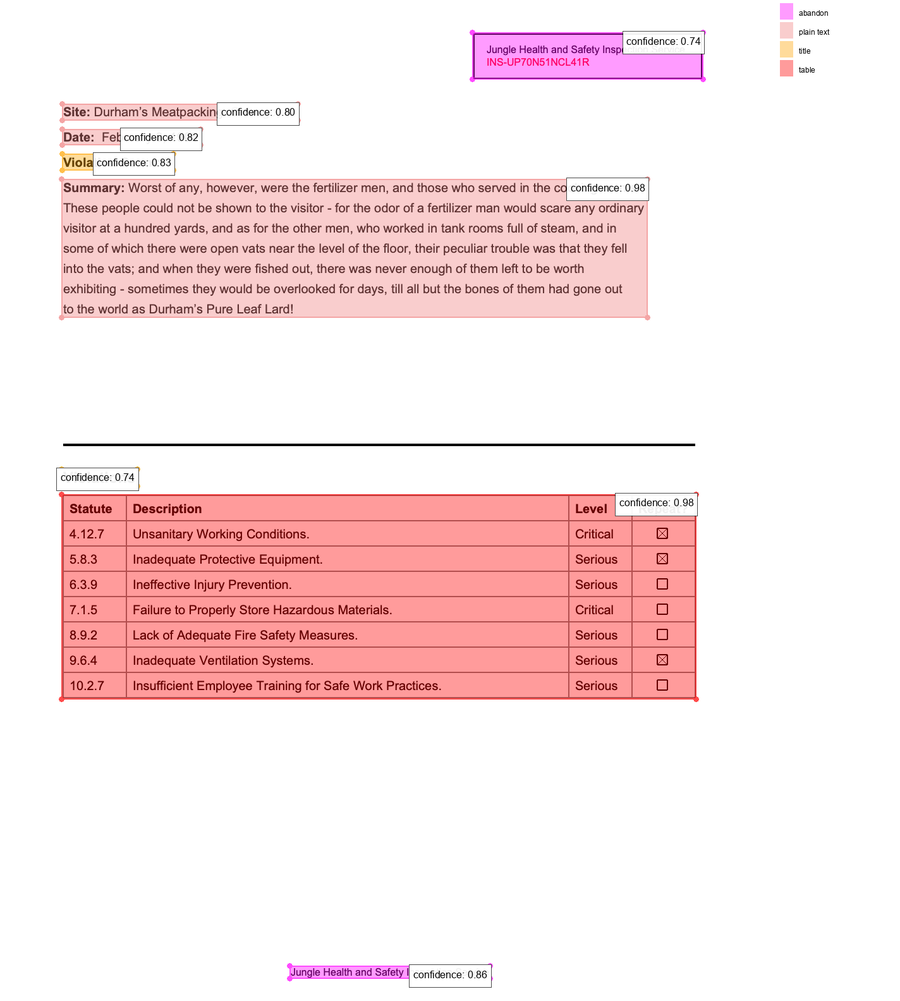

In [3]:
# Visualize all detected regions, using default colors based on type
page.clear_highlights() # Clear previous highlights
detected_regions.highlight(group_by='type', include_attrs=['confidence'])

# Show the image with region overlays
page.to_image(width=900)

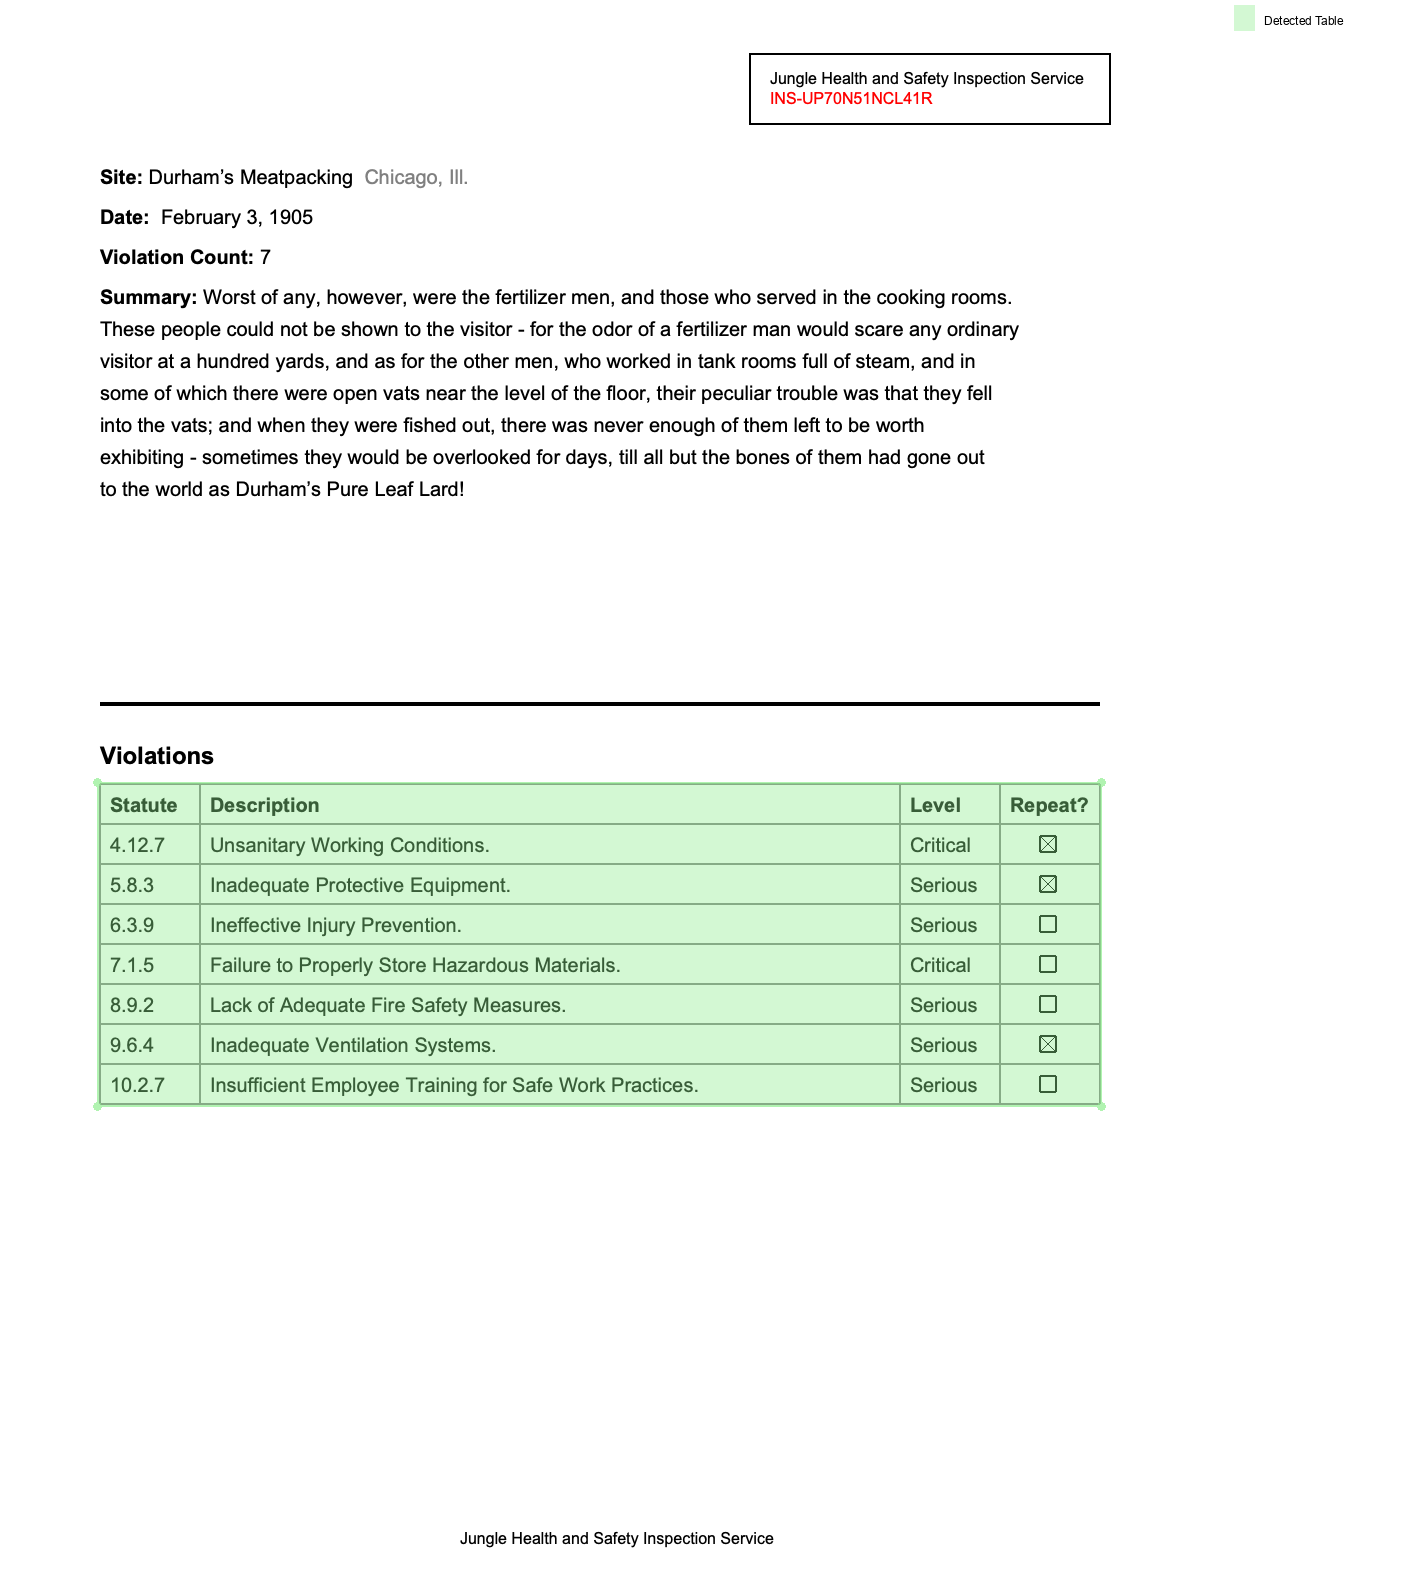

In [4]:
# Find and visualize only the detected table region(s)
tables = page.find_all('region[type=table]')
tables.show(color='lightgreen', label='Detected Table')

In [5]:
# Extract text specifically from the detected table region
table_region = tables.first # Assuming only one table was detected
# Extract text preserving layout
table_text_layout = table_region.extract_text(layout=True)
table_text_layout

'S Statute t a t u t e D Description e s c r i p t i o n L Level e v e l R Repeat? e p e a t ? 4 4.12.7 . 1 2 . 7 U Unsanitary Working Conditions. n s a n i t a r y   W o r k i n g   C o n d i t i o n s . C Critical r i t i c a l 5 5.8.3 . 8 . 3 I Inadequate Protective Equipment. n a d e q u a t e   P r o t e c t i v e   E q u i p m e n t . S Serious e r i o u s 6 6.3.9 . 3 . 9 I Ineffective Injury Prevention. n e f f e c t i v e   I n j u r y   P r e v e n t i o n . S Serious e r i o u s 7 7.1.5 . 1 . 5 F Failure to Properly Store Hazardous Materials. a i l u r e   t o   P r o p e r l y   S t o r e   H a z a r d o u s   M a t e r i a l s . C Critical r i t i c a l 8 8.9.2 . 9 . 2 L Lack of Adequate Fire Safety Measures. a c k   o f   A d e q u a t e   F i r e   S a f e t y   M e a s u r e s . S Serious e r i o u s 9 9.6.4 . 6 . 4 I Inadequate Ventilation Systems. n a d e q u a t e   V e n t i l a t i o n   S y s t e m s . S Serious e r i o u s 1 10.2.7 0 . 2 . 7 I Insufficient Employe

In [6]:
# Layout-detected regions can also be used for table extraction
# This can be more robust than the basic page.extract_tables()
# especially for tables without clear lines.
table_data = table_region.extract_table()
table_data

[['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

Layout analysis provides structured `Region` objects. You can filter these regions by their predicted `type` and then perform actions like visualization or extracting text/tables specifically from those regions.

<div class="admonition note">
<p class="admonition-title">Layout Models and Configuration</p>

    *   Layout analysis requires external models. Ensure these are installed.
    *   You can specify different models (`engine='yolo'`, `engine='detr'`, `engine='paddle'`) or configurations (confidence thresholds, specific classes) via arguments to `page.analyze_layout()`. Different models may perform better on different document types.
    *   The detected regions are added to the page and can be found using selectors like `page.find_all('region[type=paragraph]')`.
</div>

``` 